In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import csv

csv_file = 'preprocessed_data/preprocessed_merged_apartments_population_2011-2022.csv'

apartments_df = pd.read_csv(csv_file)

apartments_df.head()

,Year,City,Rooms,Rent per m2,Rental apartment count,Sales price per m2,Sold apartments count,Rent €/mo vs. sales price k€ per m2,Total population
0,2011,Helsinki,1,18.83,9050,4645,3154,4.053821,591966.5
1,2011,Helsinki,2,14.20,5949,3966,4973,3.580434,591966.5
2,2011,Helsinki,3,12.22,2181,3987,3476,3.064961,591966.5
3,2011,Espoo-Kauniainen,1,15.72,1217,3525,370,4.459574,258952.5
4,2011,Espoo-Kauniainen,2,13.88,1318,3209,1085,4.325335,258952.5


##### Rents vs. population

City: Helsinki
Slope one room (Population Coefficient): 0.00
Slope two room (Population Coefficient): 0.00
Slope three room (Population Coefficient): 0.00


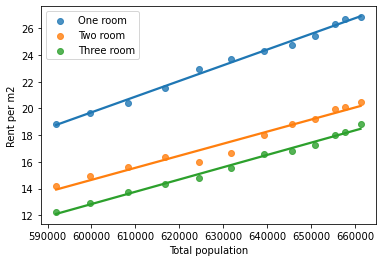

City: Espoo-Kauniainen
Slope one room (Population Coefficient): 0.00
Slope two room (Population Coefficient): 0.00
Slope three room (Population Coefficient): 0.00


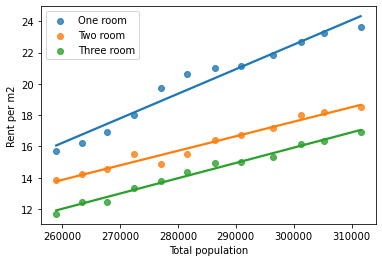

City: Vantaa
Slope one room (Population Coefficient): 0.00
Slope two room (Population Coefficient): 0.00
Slope three room (Population Coefficient): 0.00


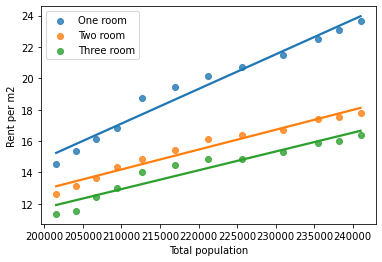

City: Porvoo
Slope one room (Population Coefficient): 0.00
Slope two room (Population Coefficient): 0.00
Slope three room (Population Coefficient): 0.00


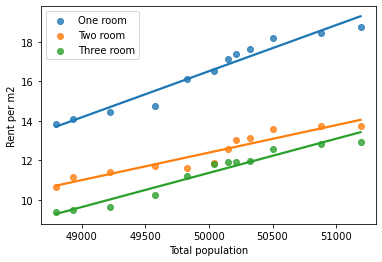

City: Tampere
Slope one room (Population Coefficient): 0.00
Slope two room (Population Coefficient): 0.00
Slope three room (Population Coefficient): 0.00


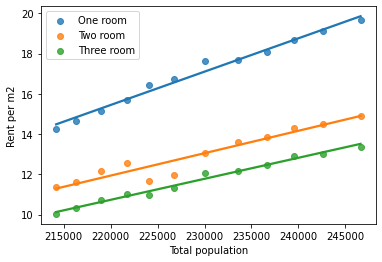

City: Turku
Slope one room (Population Coefficient): 0.00
Slope two room (Population Coefficient): 0.00
Slope three room (Population Coefficient): 0.00


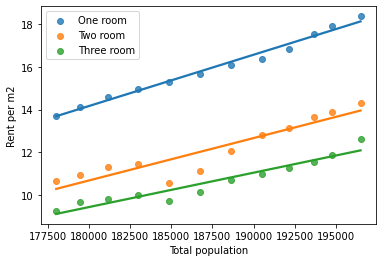

City: Pori
Slope one room (Population Coefficient): -0.00
Slope two room (Population Coefficient): -0.00
Slope three room (Population Coefficient): -0.00


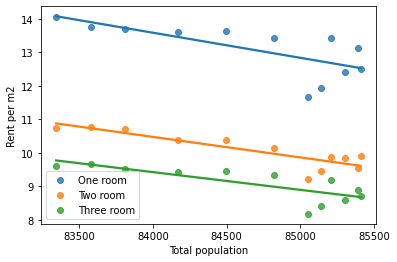

City: Lappeenranta
Slope one room (Population Coefficient): 0.00
Slope two room (Population Coefficient): 0.00
Slope three room (Population Coefficient): 0.00


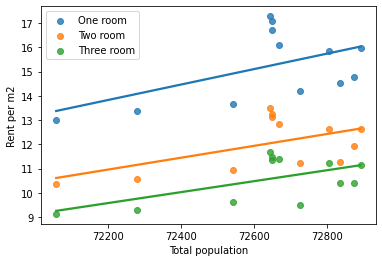

City: Kotka
Slope one room (Population Coefficient): -0.00
Slope two room (Population Coefficient): -0.00
Slope three room (Population Coefficient): -0.00


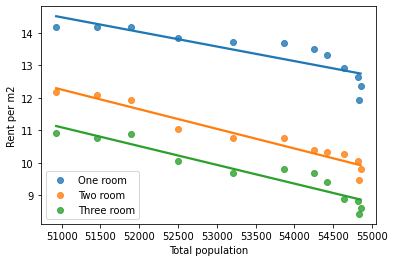

City: Kouvola
Slope one room (Population Coefficient): -0.00
Slope two room (Population Coefficient): -0.00
Slope three room (Population Coefficient): -0.00


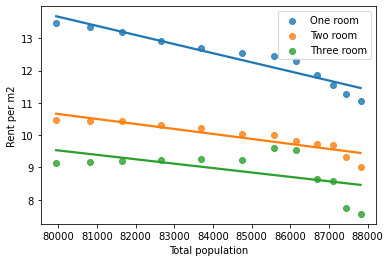

City: Lahti
Slope one room (Population Coefficient): 0.00
Slope two room (Population Coefficient): 0.00
Slope three room (Population Coefficient): 0.00


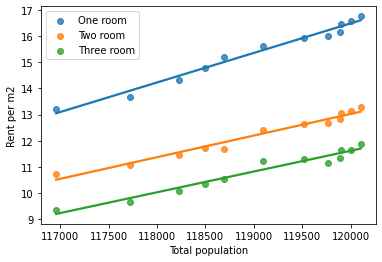

City: Hämeenlinna
Slope one room (Population Coefficient): 0.00
Slope two room (Population Coefficient): 0.00
Slope three room (Population Coefficient): 0.00


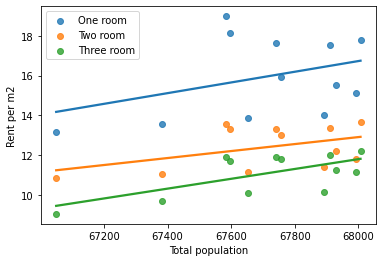

City: Kuopio
Slope one room (Population Coefficient): 0.00
Slope two room (Population Coefficient): 0.00
Slope three room (Population Coefficient): 0.00


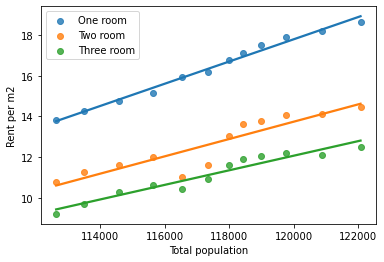

City: Jyväskylä
Slope one room (Population Coefficient): 0.00
Slope two room (Population Coefficient): 0.00
Slope three room (Population Coefficient): 0.00


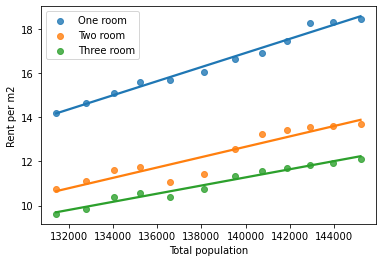

City: Vaasa
Slope one room (Population Coefficient): 0.00
Slope two room (Population Coefficient): 0.00
Slope three room (Population Coefficient): 0.00


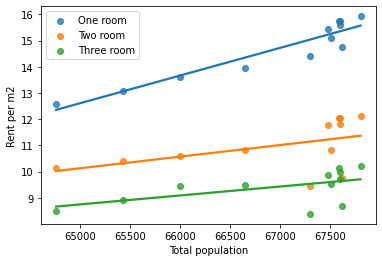

City: Seinäjoki
Slope one room (Population Coefficient): 0.00
Slope two room (Population Coefficient): 0.00
Slope three room (Population Coefficient): 0.00


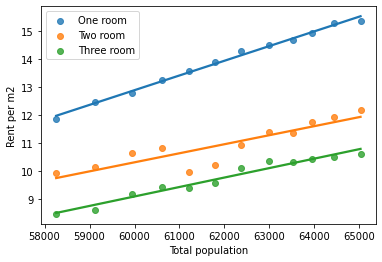

City: Mikkeli
Slope one room (Population Coefficient): -0.00
Slope two room (Population Coefficient): -0.00
Slope three room (Population Coefficient): -0.00


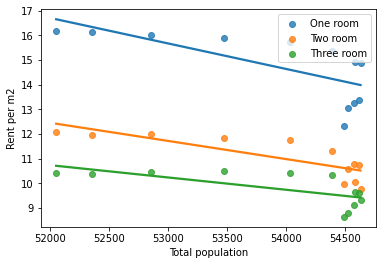

City: Joensuu
Slope one room (Population Coefficient): 0.00
Slope two room (Population Coefficient): 0.00
Slope three room (Population Coefficient): 0.00


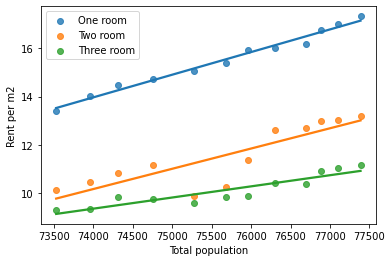

City: Oulu
Slope one room (Population Coefficient): 0.00
Slope two room (Population Coefficient): 0.00
Slope three room (Population Coefficient): 0.00


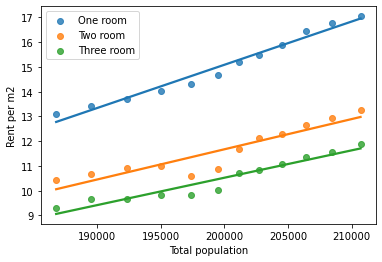

City: Rovaniemi
Slope one room (Population Coefficient): 0.00
Slope two room (Population Coefficient): 0.00
Slope three room (Population Coefficient): 0.00


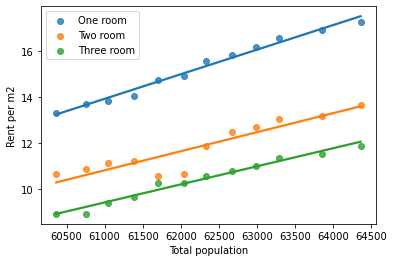

In [95]:
cities = apartments_df['City'].unique()

for city in cities:
    city_data = apartments_df[apartments_df['City'] == city]
    one_room = city_data[city_data["Rooms"]==1]
    two_room = city_data[city_data["Rooms"]==2]
    three_room = city_data[city_data["Rooms"]==3]
    
    print(f"City: {city}")

    X = one_room['Total population'].values.reshape(-1, 1)
    y = one_room['Rent per m2'].values
    
    model = LinearRegression().fit(X, y)
    slope = model.coef_[0]
    
    print(f"Slope one room (Population Coefficient): {slope:.2f}")

    X = two_room['Total population'].values.reshape(-1, 1)
    y = two_room['Rent per m2'].values
    
    model = LinearRegression().fit(X, y)
    slope = model.coef_[0]
    
    print(f"Slope two room (Population Coefficient): {slope:.2f}")

    X = three_room['Total population'].values.reshape(-1, 1)
    y = three_room['Rent per m2'].values
    
    model = LinearRegression().fit(X, y)
    slope = model.coef_[0]
    
    print(f"Slope three room (Population Coefficient): {slope:.2f}")

    sns.regplot(x="Total population", y="Rent per m2", data=city_data[city_data["Rooms"]==1], ci=None, label="One room")
    sns.regplot(x="Total population", y="Rent per m2", data=city_data[city_data["Rooms"]==2], ci=None, label="Two room")
    sns.regplot(x="Total population", y="Rent per m2", data=city_data[city_data["Rooms"]==3], ci=None, label="Three room")
    plt.legend()
    plt.show()

In [96]:
csv_file = 'preprocessed_data/preprocessed_population_fc.csv'

population_fc_df = pd.read_csv(csv_file)

population_fc_df.head()

,Municipality name,Year,Total population,0 - 14,15 - 24,25 - 44,45 - 64,65 - 74,75 -
0,Akaa,2021,16264,2628,1479,3621,4482,2368,1686
1,Akaa,2022,16142,2519,1489,3534,4468,2357,1775
2,Akaa,2023,16023,2438,1473,3448,4478,2283,1903
3,Akaa,2024,15906,2356,1451,3394,4461,2244,2000
4,Akaa,2025,15795,2267,1446,3314,4477,2215,2076


In [97]:
population_fc_df = population_fc_df[['Municipality name', 'Year', 'Total population']].copy()

population_fc_df.rename(
    columns={
        'Municipality name': 'City'
    },
    inplace=True
)

population_fc_df['City'] = population_fc_df['City'].replace(['Espoo', 'Kauniainen'], 'Espoo-Kauniainen')

population_grouped = population_fc_df.groupby(['Year', 'City'], as_index=False)
population_fc_df = population_grouped['Total population'].sum()
population_fc_df = population_fc_df.reset_index(drop=True)

population_fc_df.head()

,Year,City,Total population
0,2021,Akaa,16264
1,2021,Alajärvi,9303
2,2021,Alavieska,2495
3,2021,Alavus,11197
4,2021,Asikkala,8015


In [98]:
big_cities = ["Helsinki", "Espoo-Kauniainen", "Tampere", "Turku", "Jyväskylä", "Oulu"]
past_years = list(range(2011, 2023))
future_years = list(range(2023, 2041))

population_fc_df = population_fc_df[population_fc_df['City'].isin(big_cities)]
population_fc_df = population_fc_df[population_fc_df['Year'].isin(future_years)]

population_fc_df.head()

,Year,City,Total population
627,2023,Espoo-Kauniainen,317290
649,2023,Helsinki,673155
678,2023,Jyväskylä,146679
794,2023,Oulu,213195
882,2023,Tampere,250958


##### Predict rents based on population

In [99]:
with open('preprocessed_data/prediction_data_year_rent.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Year,City,Rooms,Rent per m2"])

    for city in big_cities:
        city_data = apartments_df[apartments_df['City'] == city]
        
        future_population = population_fc_df[population_fc_df['City'] == city]['Total population'].values.reshape(-1, 1)
    
        for room_amount in range(1, 4):
            data = city_data[city_data["Rooms"]==room_amount]
    
            X = data['Total population'].values.reshape(-1, 1)
            y = data['Rent per m2'].values
            
            prices_model = LinearRegression().fit(X, y)
            future_rent_prices = [int(x) for x in prices_model.predict(future_population)]
                    
            for index in range(len(past_years)):
                writer.writerow([past_years[index], city, room_amount, y[index]])
                
            for index in range(len(future_years)):
                writer.writerow([future_years[index], city, room_amount, future_rent_prices[index]])

##### Predict rents & prices

In [100]:
with open('preprocessed_data/prediction_data_year_rent_price.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Year,City,Rooms,Rent per m2,Sales price per m2"])

    for city in big_cities:
        city_data = apartments_df[apartments_df['City'] == city]
        
        future_population = population_fc_df[population_fc_df['City'] == city]['Total population'].values.reshape(-1, 1)
    
        for room_amount in range(1, 4):
            data = city_data[city_data["Rooms"]==room_amount]
    
            X = data['Total population'].values.reshape(-1, 1)
            y = data['Rent per m2'].values
            
            rent_model = LinearRegression().fit(X, y)
            future_rent_prices = [int(x) for x in rent_model.predict(future_population)]
            
            y_2 = data['Sales price per m2'].values
            
            prices_model = LinearRegression().fit(X, y_2)
            future_prices = [int(x) for x in prices_model.predict(future_population)]
                    
            for index in range(len(past_years)):
                writer.writerow([past_years[index], city, room_amount, y[index], y_2[index]])
                
            for index in range(len(future_years)):
                writer.writerow([future_years[index], city, room_amount, future_rent_prices[index], future_prices[index]])

##### Append prediction to original data

In [101]:
apartments_df.drop(['Rental apartment count', 'Sold apartments count'], axis=1, inplace=True)
apartments_df = apartments_df[apartments_df['City'].isin(big_cities)]
apartments_df.head()

,Year,City,Rooms,Rent per m2,Sales price per m2,Rent €/mo vs. sales price k€ per m2,Total population
0,2011,Helsinki,1,18.83,4645,4.053821,591966.5
1,2011,Helsinki,2,14.20,3966,3.580434,591966.5
2,2011,Helsinki,3,12.22,3987,3.064961,591966.5
3,2011,Espoo-Kauniainen,1,15.72,3525,4.459574,258952.5
4,2011,Espoo-Kauniainen,2,13.88,3209,4.325335,258952.5


In [102]:
for city in big_cities:
    city_data = apartments_df[apartments_df['City'] == city]
    
    future_population = population_fc_df[population_fc_df['City'] == city]['Total population'].values.reshape(-1, 1)
    future_population_list = list(population_fc_df[population_fc_df['City'] == city]['Total population'])

    for room_amount in range(1, 4):
        data = city_data[city_data["Rooms"]==room_amount]

        X = data['Total population'].values.reshape(-1, 1)
        y = data['Rent per m2'].values
        
        rent_model = LinearRegression().fit(X, y)
        future_rent_prices = [x for x in rent_model.predict(future_population)]
        
        y_2 = data['Sales price per m2'].values
        
        prices_model = LinearRegression().fit(X, y_2)
        future_prices = [int(x) for x in prices_model.predict(future_population)]
        
            
        future_data = {'Year': future_years, 
                    'City': [city] * len(future_years),
                    'Rooms': [room_amount] * len(future_years), 
                    'Rent per m2': future_rent_prices, 
                    'Sales price per m2': future_prices, 
                    'Total population': future_population_list}
        
        predictions_df = pd.DataFrame(future_data)
        
        apartments_df = apartments_df.append(predictions_df, ignore_index=True)
        

apartments_df['Rent €/mo vs. sales price k€ per m2'] = apartments_df['Rent per m2'] / apartments_df['Sales price per m2'] * 1000


##### Write to .csv

In [103]:
file_path = 'preprocessed_data/predictions_rent_price_2011-2040.csv'
apartments_df.to_csv(file_path, index=False)